# Objective
* 탐지된 영역 확인

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from fileutil import FileUtil
from image import ImageLoader
import cv2
import logging
from motiondetector import find_object
import matplotlib.pyplot as plt
import numpy as np

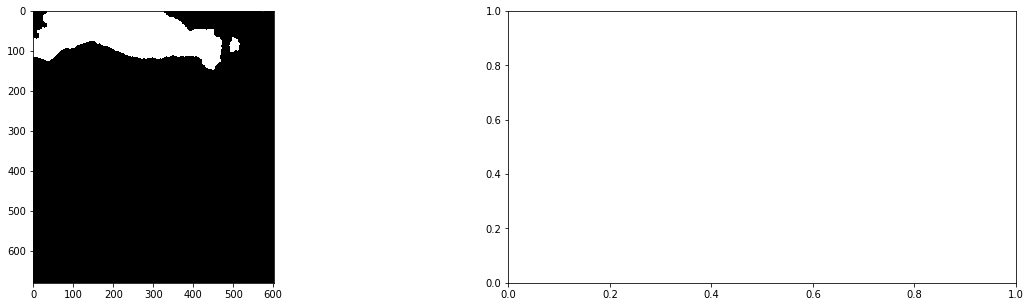

In [95]:
datadir='data/act3/'
mask=cv2.imread(datadir + '0612-foreground.png')
fig, ax=plt.subplots(1, 2, figsize=(20, 5))
ax[0].imshow(mask)
FRAME_SCALE = 1.0
OBJECT_SIZE = (50 * 50, 150 * 300)
OBJECT_SIZE = (FRAME_SCALE * np.array(OBJECT_SIZE)).astype(np.int).tolist()

In [106]:
def find_object(fgmask, object_size_threshold):
    lbound = 240
    ubound = 255
    ncon=0

    # mask = cv2.inRange(fgmask, lbound, ubound)
    _, mask = cv2.threshold(fgmask, 128, 255, cv2.THRESH_BINARY_INV)

    contours, _ = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    ncon=len(contours)
    if ncon < 1:
        return [None] * 4

    # method#1 : contour bounding box
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    x, y, w, h = cv2.boundingRect(contours[0])
    s=cv2.contourArea(contours[0])
    print(f'contourArea : {s}')
    if object_size_threshold[1] >= s >= object_size_threshold[0]:
        return x, y, w, h

    # method#2 ; contour area & convex hull
    # contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
    # if cv2.contourArea(contours[0]) and cv2.isContourConvex(contours[0]):
    #     return x, y, w, h

    # method#3 ; contour area & max/max size
    # contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
    # s=cv2.contourArea(contours[0])
    # if s > :
    #     return x, y, w, h

    return [None] * 4


In [107]:
find_object(mask, OBJECT_SIZE)

error: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


43501.5
264.5
12.0


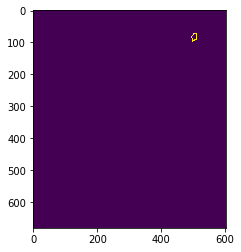

In [81]:
lbound = 0
ubound = 256

# mask2 = cv2.inRange(mask, lbound, ubound)
_, mask2 = cv2.threshold(mask2, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(mask2)

contours, _ = cv2.findContours(mask2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
for con in contours:
    print(f'{cv2.contourArea(con)}')
    conimage=np.zeros_like(mask2)
    cv2.drawContours(conimage, contours, 1, (255), thickness=2)
    plt.imshow(conimage)

In [76]:
contours, _ = cv2.findContours(mask2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

3

In [77]:
type(contours)

list

In [80]:
cv2.contourArea(contours[2])

1505.0

In [4]:
a=np.array([[1, 2], [3, 4]])

In [5]:
a+np.array([2, 2])

array([[3, 4],
       [5, 6]])